# Week 02 Homework

In [2]:
import os
import pandas as pd

fp = 'C:\\Users\\rites\\OneDrive\\Desktop\\Machine Learning 501\\Intel-ML101-Class2\\data\\Orange_Telecom_Churn_Data.csv'

data = pd.read_csv(fp)

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [3]:
#taking a look at data
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Removing irrelevent data
data.drop(['state','area_code','phone_number'], axis = 1, inplace = True)

In [5]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [6]:
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [9]:
#making categorical data in binary
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
data = pd.DataFrame(msc.fit_transform(data), columns = data.columns)

data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [13]:
#Splitting table in two features(x_data) and label(y_data)
x_col = [x for x in data.columns if x!= 'churned']

x_data = data[x_col]
y_data = data['churned']

In [16]:
y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churned, dtype: float64

In [17]:
x_data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333


In [19]:
#Applying knn to the data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

In [20]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [27]:
def accuracy(real, predict):
    a = sum(real == predict)/float(real.shape[0])
    return a

In [28]:
print(accuracy(y_data, y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [29]:
#KNN n=3 using weights for distance
knn2 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knn2 = knn2.fit(x_data, y_data)
y_pred2 = knn2.predict(x_data)

In [30]:
print(accuracy(y_data, y_pred2))

1.0


In [39]:
#KNN n=3 using p=1 for manhattan diatance
knn3 = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn3 = knn3.fit(x_data, y_data)
y_pred3 = knn3.predict(x_data)

In [40]:
print(accuracy(y_data, y_pred3))

0.9456


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [54]:
#KNN FOR K=1 to 20
a = []
k = []

for i in range(1,21):
    k.append(i)
    n = KNeighborsClassifier(n_neighbors = i)
    n = n.fit(x_data, y_data)
    p = n.predict(x_data)
    a.append(accuracy(y_data, p))

[Text(0,0.5,'k'), Text(0.5,0,'accuracy'), Text(0.5,1,'accuracy vs k')]

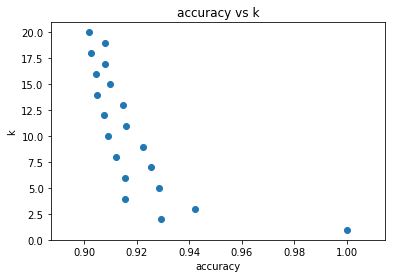

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
ax.scatter(a,k)
ax.set(xlabel='accuracy', ylabel='k', title='accuracy vs k')

In [60]:
print(a)

[1.0, 0.9292, 0.9422, 0.9154, 0.9284, 0.9156, 0.9254, 0.9122, 0.9224, 0.9092, 0.9158, 0.9076, 0.9148, 0.905, 0.9098, 0.9044, 0.908, 0.9028, 0.9078, 0.902]


In [61]:
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# Ritesh Kumar